In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

> Create a straight line dataset using the linear regression formula (weight * X + bias).

> Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

In [3]:
weight, bias = 0.3, 0.9
start, end, step = 0, 1, 0.01
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

In [4]:
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

> Split the data into 80% training, 20% testing.

In [5]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([80, 1]),
 torch.Size([80, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]))

> Plot the training and testing data so it becomes visual.


In [6]:
def plot_predictions(train_data = X_train.cpu(),
                     train_labels = y_train.cpu(),
                     test_data = X_test.cpu(),
                     test_labels = y_test.cpu(),
                     predictions = None):

  plt.figure(figsize = (10,7))
  plt.scatter(X_train, y_train, s=4, c = 'b', label = 'Training Data')
  plt.scatter(X_test, y_test, s=4, c = 'g', label = 'Testing Data')

  if predictions is not None:
    plt.scatter(X_test, predictions, s=4, c = 'r', label = 'Predicted Data')

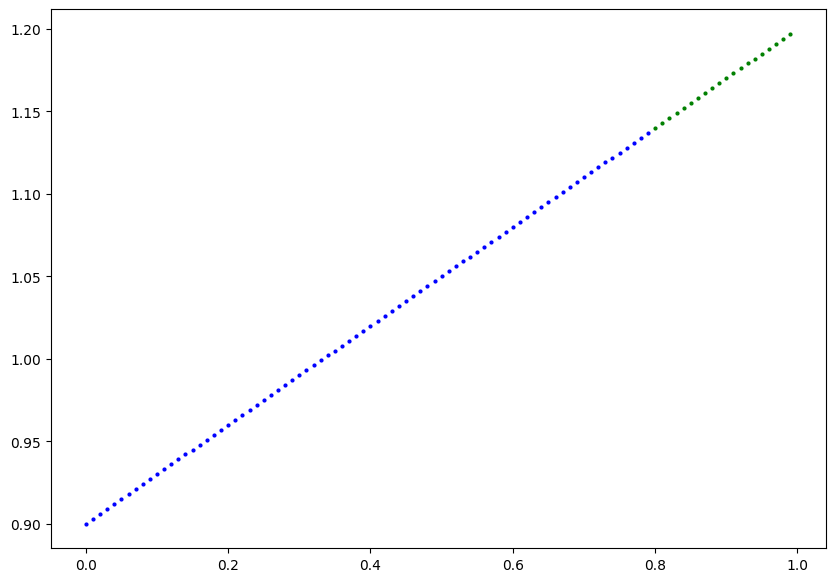

In [7]:
plot_predictions()

> Build a PyTorch model by subclassing nn.Module.

In [8]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, X: torch.tensor) -> torch.tensor:
    return self.linear(X)

In [9]:
torch.manual_seed(42)

model = LinearRegressionModel().to(device)

In [10]:
model

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [11]:
model.state_dict(), next(model.parameters()).device

(OrderedDict([('linear.weight', tensor([[0.7645]], device='cuda:0')),
              ('linear.bias', tensor([0.8300], device='cuda:0'))]),
 device(type='cuda', index=0))

In [12]:
model_1_parameter_path = '/content/drive/MyDrive/Colab Notebooks/pytorch_tutorial/models/pytorch_workflow_fundamentals_model_1.pth'
model.load_state_dict(torch.load(model_1_parameter_path))

<All keys matched successfully>

In [13]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear.bias', tensor([0.3025], device='cuda:0'))])

In [14]:
model.eval()

with torch.inference_mode():
  y_preds = model(X_test.to(device))

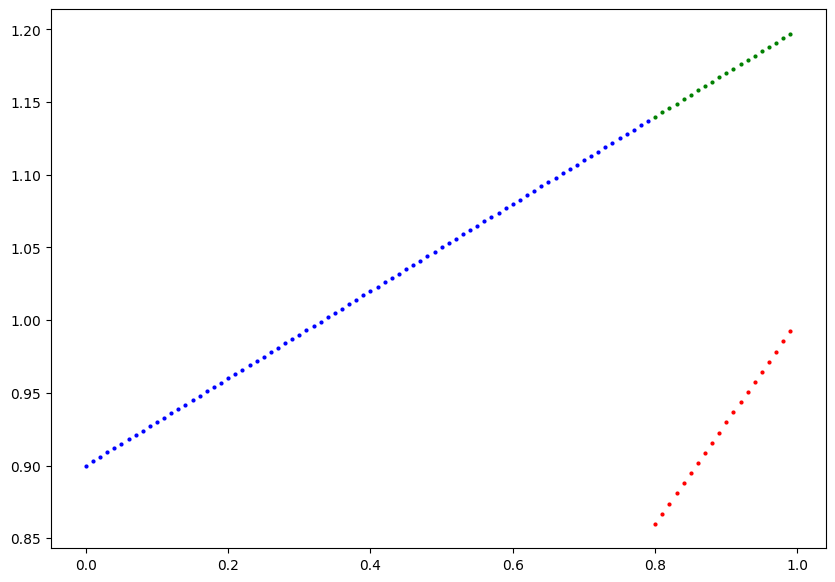

In [15]:
plot_predictions(predictions = y_preds.cpu())

In [16]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 1e-2)

In [17]:
torch.manual_seed(42)

X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

epochs = 500

for epoch in range(epochs):

  model.train()

  y_preds = model(X_train)

  loss = loss_fn(y_preds, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_preds = model(X_test)
    test_loss = loss_fn(test_preds, y_test)

    if epoch % 20 == 0:
      print(f'Epoch: {epoch} | Training Loss: {loss} | Testing Loss: {test_loss}')

Epoch: 0 | Training Loss: 0.44075140357017517 | Testing Loss: 0.22881153225898743
Epoch: 20 | Training Loss: 0.20954659581184387 | Testing Loss: 0.042261697351932526
Epoch: 40 | Training Loss: 0.11295250803232193 | Testing Loss: 0.18601317703723907
Epoch: 60 | Training Loss: 0.09946088492870331 | Testing Loss: 0.21339209377765656
Epoch: 80 | Training Loss: 0.09204050153493881 | Testing Loss: 0.20990586280822754
Epoch: 100 | Training Loss: 0.08514092117547989 | Testing Loss: 0.19634151458740234
Epoch: 120 | Training Loss: 0.07828690111637115 | Testing Loss: 0.18104635179042816
Epoch: 140 | Training Loss: 0.07143286615610123 | Testing Loss: 0.1657511442899704
Epoch: 160 | Training Loss: 0.0645788311958313 | Testing Loss: 0.15045598149299622
Epoch: 180 | Training Loss: 0.05772479996085167 | Testing Loss: 0.13516080379486084
Epoch: 200 | Training Loss: 0.05087175592780113 | Testing Loss: 0.11952164024114609
Epoch: 220 | Training Loss: 0.044020626693964005 | Testing Loss: 0.1031945347785949

In [18]:
model.eval()

with torch.inference_mode():
  y_preds = model(X_test)

y_preds

tensor([[1.1335],
        [1.1365],
        [1.1395],
        [1.1426],
        [1.1456],
        [1.1486],
        [1.1517],
        [1.1547],
        [1.1578],
        [1.1608],
        [1.1638],
        [1.1669],
        [1.1699],
        [1.1729],
        [1.1760],
        [1.1790],
        [1.1820],
        [1.1851],
        [1.1881],
        [1.1912]], device='cuda:0')

In [19]:
y_preds - y_test

tensor([[-0.0065],
        [-0.0065],
        [-0.0065],
        [-0.0064],
        [-0.0064],
        [-0.0064],
        [-0.0063],
        [-0.0063],
        [-0.0062],
        [-0.0062],
        [-0.0062],
        [-0.0061],
        [-0.0061],
        [-0.0061],
        [-0.0060],
        [-0.0060],
        [-0.0060],
        [-0.0059],
        [-0.0059],
        [-0.0058]], device='cuda:0')

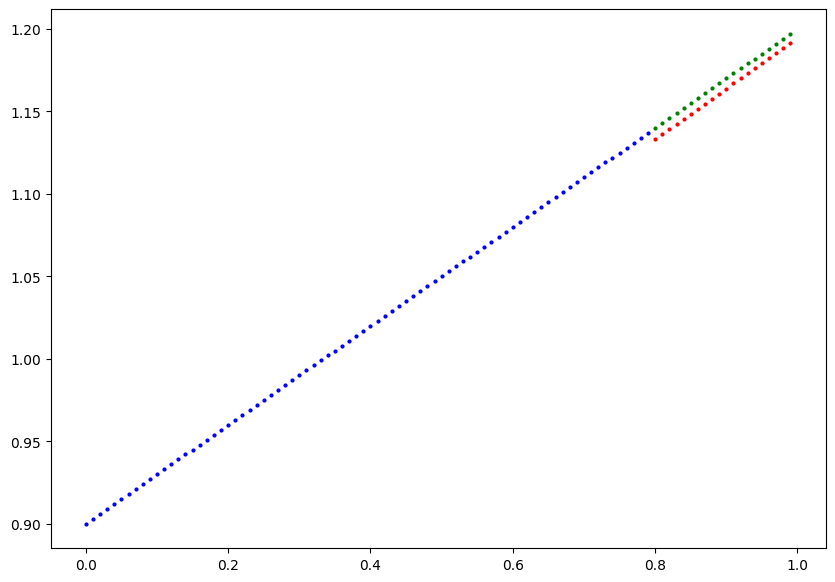

In [20]:
  plt.figure(figsize = (10,7))
  plt.scatter(X_train.cpu(), y_train.cpu(), s=4, c = 'b', label = 'Training Data')
  plt.scatter(X_test.cpu(), y_test.cpu(), s=4, c = 'g', label = 'Testing Data')
  plt.scatter(X_test.cpu(), y_preds.cpu(), s=4, c = 'r', label = 'Predicted Data')

In [26]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.3037]], device='cuda:0')),
             ('linear.bias', tensor([0.8905], device='cuda:0'))])

In [28]:
path = '/content/drive/MyDrive/Colab Notebooks/pytorch_tutorial/models/01_excercises_best_model.pth'
torch.save(obj = model.state_dict(), f = path)

In [33]:
loaded_model = LinearRegressionModel().to(device)

loaded_model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [35]:
loaded_model.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')